# Running DeepSort Object Tracking with YOLO Object Detections in Google Colab!


# Step 1: Enabling GPU within your notebook

## Step 2: Cloning the Repository
The following cell will clone the yolov4-deepsort repository from github, to enable the rest of the tutorial and grab the code.

In [ ]:
# clone repository for deepsort with yolov4
!git clone https://github.com/theAIGuysCode/yolov4-deepsort

In [ ]:
# step into the yolov4-deepsort folder
%cd yolov4-deepsort/

## Step 3: Install Dependencies
본 폴더의 프로그램들은 파이썬 3.7버전, 그리고 tensorflow2.3버전을 필요로 한다.
2021.8월 현재 코랩의 파이썬은 3.7버전을 사용중이나, tensorflow는 2.5버전을 사용중이므로 오류가 난다. 따라서 tensorflow를 업데이트 해줘야 한다. 파이썬 버전에 따라 다운로드 받을 수 있는 tensorflow가 제한되므로, 파이썬의 버전확인 및 업데이트가 텐서플로우 업데이트 보다 선행되어야 한다.

In [ ]:
!python --version

In [ ]:
#현재 구글 코랩의 다운로드 된 패키지(라이브러리) 리스트 출력
!pip freeze

In [ ]:
#현재(2021.8.20) 코랩 환경에서는 tensorflow 2.5.0을 사용중인데, 아래의 버전을 사용해야 오류가 없다.
!pip install tensorflow==2.3.0rc0

## Step 4: Get YOLOv4 Pre-trained Weights
For this tutorial we will be using the pre-trained YOLOv4 model, trained on over 80 classes.

(선택1) custom model로 하려면..

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#names 파일, weight파일, 동영상파일을 내 드라이브로 부터 현재 디렉토리로 복사
!cp /content/gdrive/Shareddrives/PHASOR/2팀/YOLOv4_ObjTrack/obj.names data/classes
!cp /content/gdrive/Shareddrives/PHASOR/2팀/YOLOv4_ObjTrack/pothole.mp4 data/video 
!cp /content/gdrive/Shareddrives/PHASOR/2팀/YOLOv4_ObjTrack/yolov4-obj_last.weights data

(선택2) Pretrained model로 하려면...

In [ ]:
# download yolov4 model weights to data folder
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights -P data/

## Step 5: Convert YOLOv4 Darknet Weights to TensorFlow model


# Custom Model로 하려면...

**현재 디렉토리(yolov4-deepsort)안에**




save_model.py파일을 열고

flags.DEFINE_string('weights', './data/yolov4.weights', 'path to weights file')

을

flags.DEFINE_string('weights', './data/yolov4-obj_last.weights', 'path to weights file')

로 바꿔 주세요. 그리고

core/config.py 파일을 열고


__C.YOLO.CLASSES              = "./data/classes/coco.names"

을

__C.YOLO.CLASSES              = "./data/classes/obj.names"

로 바꿔주세요


pretrained 혹은 custom model에 따라 model을 python 코드로 변형 해줍니다

In [ ]:
# Convert darknet weights to tensorflow model
!python save_model.py --model yolov4

## Step 6: Running DeepSort with YOLOv4

Let the fun begin! You can now run your object tracker. Unfortunately Google Colab doesn't support displaying video while its being processed. So we will be suppressing the output of the object tracker as it runs and then we will display the entire video once it has finished processing.

테스트 할 비디오를 ./data/video/ 에 넣고 아래의 코드를 수정할 필요가 있음.

In [ ]:
# run DeepSort with YOLOv4 Object Detections as backbone (enable --info flag to see info about tracked objects)
!python object_tracker.py --video ./data/video/pothole.mp4 --output ./outputs/tracker.avi --model yolov4 --dont_show --info
# Run yolov4 deep sort object tracker on webcam (set video flag to 0)

In [ ]:
# define helper function to display videos
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# convert resulting video from avi to mp4 file format
import os
%cd outputs/
!ffmpeg -y -loglevel panic -i tracker.avi output.mp4
%cd ..

In [ ]:
show_video("outputs/output.mp4", width=960)


# 끝







## Bonus: 80개중 일부만 감지하고 싶다면?


You may not want to run your object tracker on all 80+ classes that the pre-trained YOLOv4 model is trained on. We can edit a couple lines of code in the object_tracker.py file to allow only certain classes to be tracked.

See what classes are available in pre-trained model: [COCO CLASSES](http://cocodataset.org/#explore)

To pick which classes to track, open object_tracker.py file by double clicking on it in the Files section of your notebook.

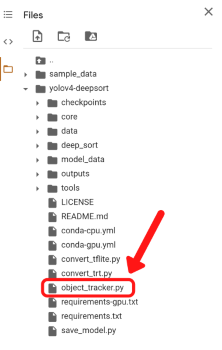

Scroll down to lines 160-163. Comment out line 160 and uncomment line 163, changing the list by adding any of the class names to the list in a comma separated fashion.

Below example would only allow object tracking of 'person's and 'car's.

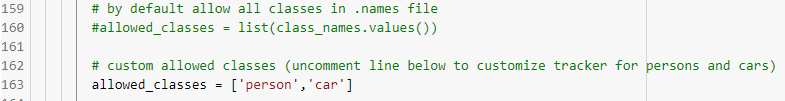
 
For the example I will show you, I have only allowed the class 'car's.

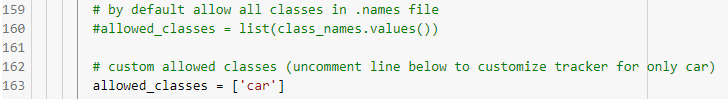

Now let's run the object tracker on a different video to test it out.

끝

---



다크넷 깔기

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
!make

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4.cfg", "cfg/coco.data", "yolov4.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)
  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height
  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# run test on person.jpg image that comes with repository
image = cv2.imread("data/person.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

# Webcam

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes